In [1]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt

# Read in geometry defined by Nikolai

In [33]:
stacked_spheres = trimesh.load_mesh('../sphere-charging/geometry/stacked_spheres.stl') 
stacked_spheres.apply_scale(1e-3)

<trimesh.Trimesh(vertices.shape=(22044, 3), faces.shape=(48048, 3))>

In [34]:
stacked_spheres.show()

[-9.61651984e-07  8.91095517e-07  1.35715769e-07]


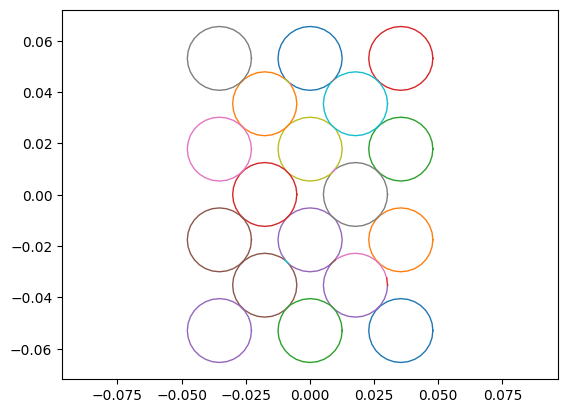

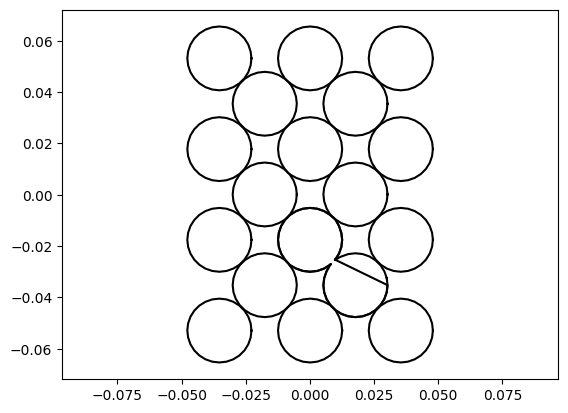

In [37]:
## make 2D slices

meshes = stacked_spheres.split(only_watertight=False)
# the convex hull of every component
meshes_convex = [i.convex_hull for i in meshes if i.vertices.shape[0] > 300]

# combine all components into one mesh
convex_combined = np.sum(meshes_convex)

# get a single cross section of the mesh
section = convex_combined.section(plane_origin=stacked_spheres.centroid, plane_normal=[1, 1, 0])
print(convex_combined.centroid)
slice_2D, to_3D = section.to_2D()

# if we want to intersect a line with this 2D polygon, we can use shapely methods
polygons = slice_2D.polygons_full

slice_2D.show()
plt.figure()
for polygon in polygons:
    x, y = polygon.exterior.xy
    plt.plot(x, y, 'k-')
plt.axis('equal')
plt.show()


In [49]:
import trimesh.exchange.stl

# Get ASCII STL string
ascii_stl_str = trimesh.exchange.stl.export_stl_ascii(mesh=convex_combined)

# Write it to a file
with open("../sphere-charging/geometry/stacked_spheres_edited.stl", "w") as f:
    f.write(ascii_stl_str)

# Define stacked spheres using trimesh

In [11]:
import numpy as np
import trimesh

# Parameters
radius = 100  # meters (50 microns)
n_rows = 3
n_cols = 3
n_layers = 3

# HCP spacing
dx = 2 * radius                     # Along x
dz = np.sqrt(3) * radius           # Along z (in-plane offset)
dy = 2 * radius #* np.sqrt(2/3)


sphere_template = trimesh.creation.icosphere(subdivisions=3, radius=radius)
spheres = []

for layer in range(n_layers):
    for row in range(n_rows):
        for col in range(n_cols):
            # Offset x in every other row
            x = col * dx + (radius if row % 2 == 1 else 0)
            z = row * dz
            y = layer * dy
            center = np.array([x, y, z])
            s = sphere_template.copy()
            s.apply_translation(center)
            spheres.append(s)

hcp_spheres = trimesh.util.concatenate(spheres)
hcp_spheres.apply_translation(-hcp_spheres.centroid)  # center at origin

# get a single cross section of the mesh
hcp_spheres.apply_scale(1e-3)
centroid = hcp_spheres.centroid
# Translate the mesh so that the centroid is at (0, 0, 0)
hcp_spheres.apply_translation(-centroid)

hcp_spheres.show()

In [6]:
# Get bounding box corners
min_corner, max_corner = hcp_spheres.bounds  # shape (2, 3)

# Compute size along each axis (X, Y, Z)
size = max_corner - min_corner

print(f"Bounding box min corner: {min_corner}")
print(f"Bounding box max corner: {max_corner}")
print(f"Size (X x Y x Z): {size}")

Bounding box min corner: [-0.33333333 -0.3        -0.27320508]
Bounding box max corner: [0.36666667 0.3        0.27320508]
Size (X x Y x Z): [0.7        0.6        0.54641016]


In [ ]:
# Areas of all triangles (in the mesh surface)
triangle_areas = sphere_template.area_faces  # shape: (num_faces,)

# Average area
mean_area = triangle_areas.mean()
print(f"Mean triangle area: {mean_area:.4f}")
# should translate to an area of around 1 micron... in which case we should not go above a map spacing of 2 microns

Mean triangle area: 97.7070


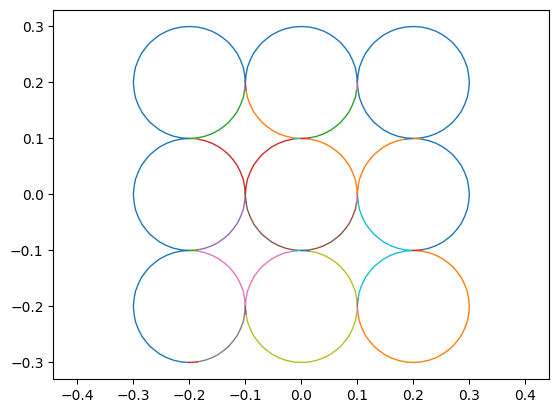

In [11]:
# get a single cross section of the mesh
section = hcp_spheres.section(plane_origin=hcp_spheres.centroid, plane_normal=[0, 0, 1])
slice_2D, to_3D = section.to_2D()
slice_2D.show()

In [10]:
import trimesh.exchange.stl

# Get ASCII STL string
ascii_stl_str = trimesh.exchange.stl.export_stl_ascii(mesh=hcp_spheres)

# Write it to a file
with open("../sphere-charging/geometry/stacked_spheres_frompython.stl", "w") as f:
    f.write(ascii_stl_str)


In [199]:
hcp_spheres.is_watertight

True